Here I will explore code generations of the NN of Dieseldorst et al.

# Bing - 1st Code generation fully autonomous interpretation

In [1]:
import torch
# Create a sample train_data tensor
train_data = torch.tensor([
    [0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0], # First training example
    [0.2, 0.3, 0.4, 0.5, 0.6, 2.0, 3.0, 4.0, 5.0, 6.0], # Second training example
    [0.3, 0.4, 0.5, 0.6, 0.7, 3.0, 4.0, 5.0, 6.0, 7.0], # Third training example
    [0.4, 0.5, 0.6, 0.7, 0.8, 4.0, 5.0, 6.0, 7.0, 8.0], # Fourth training example
    [0.5, 0.6, 0.7, 0.8, 0.9, 5.0, 6.0, 7.0, 8.0 ,9.0] # Fifth training example
])
# Save the train_data tensor as a .pt file
torch.save(train_data,'train_data.pt')


In [2]:
import torch
# Create a sample test_data tensor
test_data = torch.tensor([
    [0.6, 0.7, 0.8, 0.9, 1.0, 6.0, 7.0, 8.0 ,9.0 ,10.0], # First test example
    [0.7, 0.8, 0.9, 1.0, 1.1, 7.0 ,8.0 ,9.0 ,10.0 ,11.0], # Second test example
    [0.8 ,0.9 ,1.0 ,1.1 ,1.2 ,8.0 ,9.0 ,10.0 ,11.0 ,12.0], # Third test example
    [0.9 ,1.0 ,1.1 ,1.2 ,1.3 ,9.0 ,10.0 ,11.0 ,12.0 ,13.0], # Fourth test example
    [1.0 ,1.1 ,1.2 ,1.3 ,1.4 ,10.0 ,11.0 ,12.0 ,13.0 ,14.0] # Fifth test example
])
# Save the test_data tensor as a .pt file
torch.save(test_data,'test_data.pt')


In [3]:
# Import PyTorch modules
import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network architecture
class C2P_Net(nn.Module):
    def __init__(self, input_size, output_size, hidden_size, num_layers):
        super(C2P_Net, self).__init__()
        # Input layer
        self.input = nn.Linear(input_size, hidden_size)
        # Hidden layers
        self.hidden = nn.ModuleList()
        for i in range(num_layers - 1):
            self.hidden.append(nn.Linear(hidden_size, hidden_size))
        # Output layer
        self.output = nn.Linear(hidden_size, output_size)
        # Activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        # Apply input layer
        x = self.input(x)
        x = self.relu(x)
        # Apply hidden layers
        for layer in self.hidden:
            x = layer(x)
            x = self.relu(x)
        # Apply output layer
        x = self.output(x)
        return x

# Define the input and output size
input_size = 5 # Conservative variables: D, tau, Sx, Sy, Sz
output_size = 5 # Primitive variables: rho, eps, vx, vy, vz

# Define the hyperparameters
hidden_size = 64 # Number of neurons in each hidden layer
num_layers = 4 # Number of hidden layers
learning_rate = 0.001 # Learning rate for the optimizer
batch_size = 32 # Batch size for the training data
num_epochs = 100 # Number of epochs for the training loop

# Create an instance of the neural network
model = C2P_Net(input_size, output_size, hidden_size, num_layers)

# Define the loss function and the optimizer
criterion = nn.MSELoss() # Mean squared error loss
optimizer = optim.Adam(model.parameters(), lr=learning_rate) # Adam optimizer

# Load the training data
train_data = torch.load('train_data.pt') # A tensor of shape (N, input_size + output_size)
train_inputs = train_data[:, :input_size] # A tensor of shape (N, input_size)
train_outputs = train_data[:, input_size:] # A tensor of shape (N, output_size)

# Train the neural network
for epoch in range(num_epochs):
    # Shuffle the training data
    perm = torch.randperm(train_data.size(0))
    train_data = train_data[perm]
    train_inputs = train_inputs[perm]
    train_outputs = train_outputs[perm]
    # Loop over batches
    for i in range(0, train_data.size(0), batch_size):
        # Get a batch of inputs and outputs
        batch_inputs = train_inputs[i:i+batch_size]
        batch_outputs = train_outputs[i:i+batch_size]
        # Zero the parameter gradients
        optimizer.zero_grad()
        # Forward pass
        batch_preds = model(batch_inputs)
        # Compute the loss
        loss = criterion(batch_preds, batch_outputs)
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
    # Print the loss every epoch
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

Epoch 1, Loss: 29.35655975341797
Epoch 2, Loss: 29.274694442749023
Epoch 3, Loss: 29.1894474029541
Epoch 4, Loss: 29.10521697998047
Epoch 5, Loss: 29.01968765258789
Epoch 6, Loss: 28.930150985717773
Epoch 7, Loss: 28.835430145263672
Epoch 8, Loss: 28.732898712158203
Epoch 9, Loss: 28.622377395629883
Epoch 10, Loss: 28.503252029418945
Epoch 11, Loss: 28.37835121154785
Epoch 12, Loss: 28.246747970581055
Epoch 13, Loss: 28.103662490844727
Epoch 14, Loss: 27.945627212524414
Epoch 15, Loss: 27.771228790283203
Epoch 16, Loss: 27.58047103881836
Epoch 17, Loss: 27.371503829956055
Epoch 18, Loss: 27.14107894897461
Epoch 19, Loss: 26.884862899780273
Epoch 20, Loss: 26.600299835205078
Epoch 21, Loss: 26.28435707092285
Epoch 22, Loss: 25.93753433227539
Epoch 23, Loss: 25.554149627685547
Epoch 24, Loss: 25.13055419921875
Epoch 25, Loss: 24.66327476501465
Epoch 26, Loss: 24.148452758789062
Epoch 27, Loss: 23.58139419555664
Epoch 28, Loss: 22.959033966064453
Epoch 29, Loss: 22.27767562866211
Epoch 30

C2P_Net(
  (input): Linear(in_features=5, out_features=64, bias=True)
  (hidden): ModuleList(
    (0-2): 3 x Linear(in_features=64, out_features=64, bias=True)
  )
  (output): Linear(in_features=64, out_features=5, bias=True)
  (relu): ReLU()
)

Test Loss: 4.139082431793213
Mean Relative Errors: tensor([0.3488, 0.2664, 0.1796, 0.1122, 0.0320])
Standard Deviation of Relative Errors: tensor([0.0492, 0.0388, 0.0274, 0.0159, 0.0041])


(array([80.5667307,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       , 80.5667307,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       , 80.5667307,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       , 80.5667307,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       , 80.5667307]),
 array([0.27862325, 0.28110567, 0.28358808, 0.2860705 , 0.28855291,
        0.29103532, 0.29351774, 0.29600015, 0.29848257, 0.30096498,
        0.3034474 , 0.30592981, 0.30841222, 0.31089464, 0.31337705,
        0.31585947, 0.31834188, 0.3208243 , 0.32330671, 0.32578912,
        0.32827154, 0.33075395, 0.33323637, 0.

Text(0.5, 1.0, 'Relative Errors for rho')

Text(0.5, 0, 'Relative Error')

Text(0, 0.5, 'Probability Density')

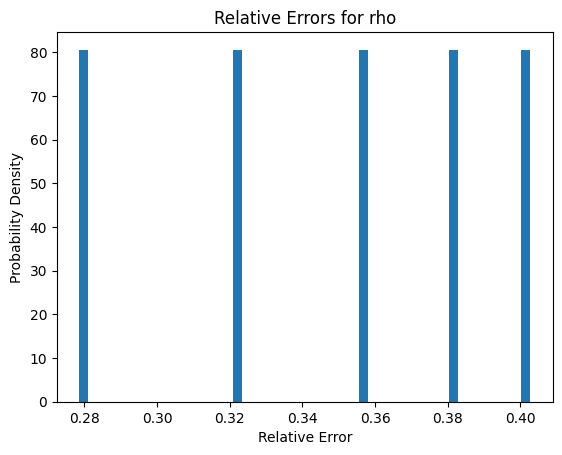

(array([102.10786705,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        , 102.10786705,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        , 102.10709026,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        , 102.10864385,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        , 102.10864385]),
 array([0.21165779, 0.21361651, 0.21557522, 0.21753393, 0.21949264,
        0.22145136, 0.22341007, 0.22536878, 0.2273275 , 0.22928621,
        0.23124492, 0.23320363, 0.23516235, 0.23712105, 0.

Text(0.5, 1.0, 'Relative Errors for eps')

Text(0.5, 0, 'Relative Error')

Text(0, 0.5, 'Probability Density')

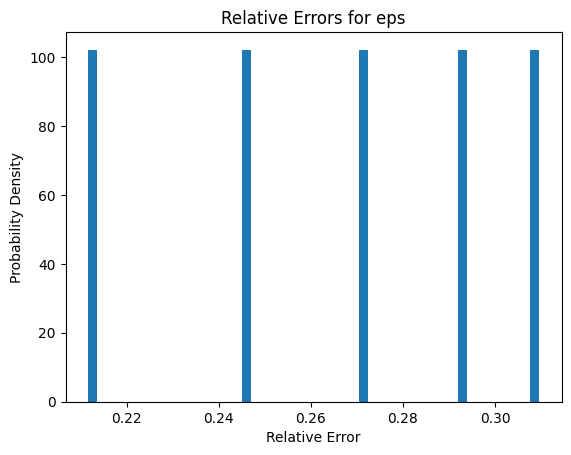

(array([144.77938407,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
        144.77938407,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        , 144.78094581,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        , 144.77938407,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        , 144.77938407]),
 array([0.14127439, 0.1426558 , 0.1440372 , 0.14541861, 0.14680001,
        0.14818142, 0.14956284, 0.15094423, 0.15232565, 0.15370706,
        0.15508845, 0.15646987, 0.15785126, 0.15923268, 0.

Text(0.5, 1.0, 'Relative Errors for vx')

Text(0.5, 0, 'Relative Error')

Text(0, 0.5, 'Probability Density')

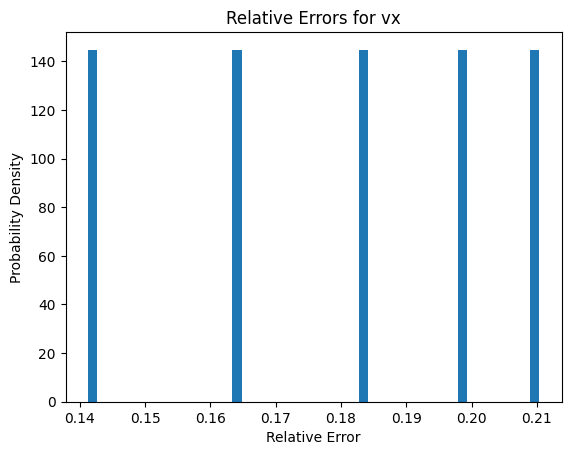

(array([249.82359795,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
        249.82359795,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        , 249.82127295,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        , 249.82127295,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        , 249.82359795]),
 array([0.08996836, 0.09076893, 0.09156949, 0.09237006, 0.09317063,
        0.09397119, 0.09477176, 0.09557232, 0.09637289, 0.09717346,
        0.09797402, 0.09877459, 0.09957515, 0.10037572, 0.

Text(0.5, 1.0, 'Relative Errors for vy')

Text(0.5, 0, 'Relative Error')

Text(0, 0.5, 'Probability Density')

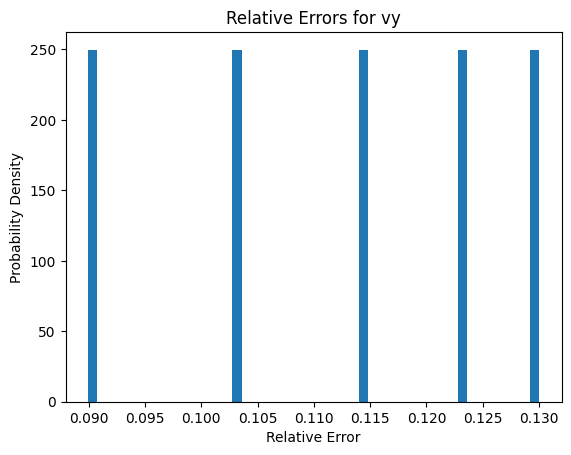

(array([976.63500541,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        , 976.62612239,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        , 976.62612239,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        , 976.6438886 ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        , 976.62612239]),
 array([0.02608013, 0.02628492, 0.0264897 , 0.02669449, 0.02689927,
        0.02710406, 0.02730884, 0.02751363, 0.02771841, 0.0279232 ,
        0.02812798, 0.02833277, 0.02853755, 0.02874234, 0.

Text(0.5, 1.0, 'Relative Errors for vz')

Text(0.5, 0, 'Relative Error')

Text(0, 0.5, 'Probability Density')

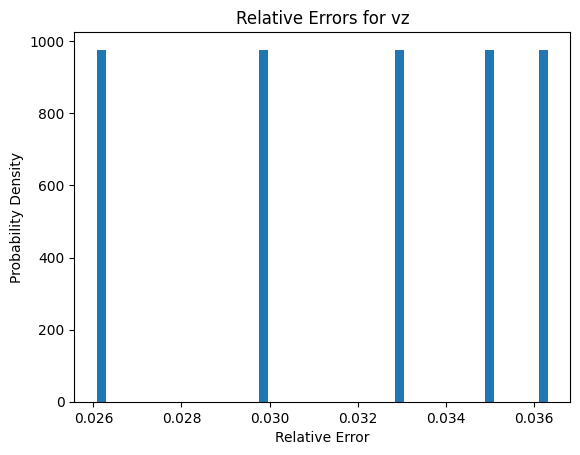

In [4]:
# Save the trained model
torch.save(model, 'c2p_net.pt')

# Load the test data
test_data = torch.load('test_data.pt') # A tensor of shape (M, input_size + output_size)
test_inputs = test_data[:, :input_size] # A tensor of shape (M, input_size)
test_outputs = test_data[:, input_size:] # A tensor of shape (M, output_size)

# Evaluate the neural network on the test data
model.eval() # Set the model to evaluation mode
with torch.no_grad(): # Disable gradient computation
    # Forward pass
    test_preds = model(test_inputs)
    # Compute the test loss
    test_loss = criterion(test_preds, test_outputs)
    # Print the test loss
    print(f'Test Loss: {test_loss.item()}')

    # Compute the relative error for each output variable
    test_errors = torch.abs((test_preds - test_outputs) / test_outputs)
    # Print the mean and standard deviation of the relative errors
    print(f'Mean Relative Errors: {test_errors.mean(dim=0)}')
    print(f'Standard Deviation of Relative Errors: {test_errors.std(dim=0)}')

    import matplotlib.pyplot as plt
    # Define the output variable names
    output_names = ['rho', 'eps', 'vx', 'vy', 'vz']
    # Loop over the output variables
    for i in range(output_size):
        # Select the relative errors for the current output variable
        errors = test_errors[:, i]
        # Plot the histogram of the errors
        plt.hist(errors, bins=50, density=True)
        # Set the title and labels
        plt.title(f'Relative Errors for {output_names[i]}')
        plt.xlabel('Relative Error')
        plt.ylabel('Probability Density')
        # Show the plot
        plt.show()

